**Viva la patanella**

Import required modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/merged_APPA_data.csv')
df.Data = pd.to_datetime(df.Data)

In [3]:
def subdf(df, pollutant, station):
    mask = (df.Inquinante == pollutant) & (df.Stazione == station)
    subdf = df[mask]

    return subdf


In [4]:
def compress_data(df, resample_rule):
    df_mean = df.resample(resample_rule, on='Data').mean()
    df_mean = df_mean.reset_index()
    return df_mean


In [69]:
def plot_ewm(df, ax, span):
    df_smooth = df.Valore.ewm(span=span).mean()
    ax.plot(df.Data, df.Valore, linewidth=1, color="blue")
    ax.plot(df.Data, df_smooth, color="#ff0000", linewidth=3)
    ax.plot(df.Data, np.full(df.shape[0], df.Valore.mean()), ls="--", color="black")

In [70]:
stations = ['Monte Gaza', 'Riva del Garda', 'Parco S. Chiara', 'Piana Rotaliana', 'Rovereto', 'Via Bolzano', 'A22 (Avio)', 'Borgo Valsugana']
threshold = {'PM10': [36, 50], 
             'Biossido di Azoto': [101, 200], 
             'Ozono': [121, 180], 
             'PM2.5': [201, 350], 
             'Ossido di Carbonio': [7.6, 10], 
             'Biossido Zolfo': [201, 350]}

Plot multiple subplots with pollutant daily concentration and exponential weighted moving average.

ValueError: could not broadcast input array from shape (5,) into shape (1623,)

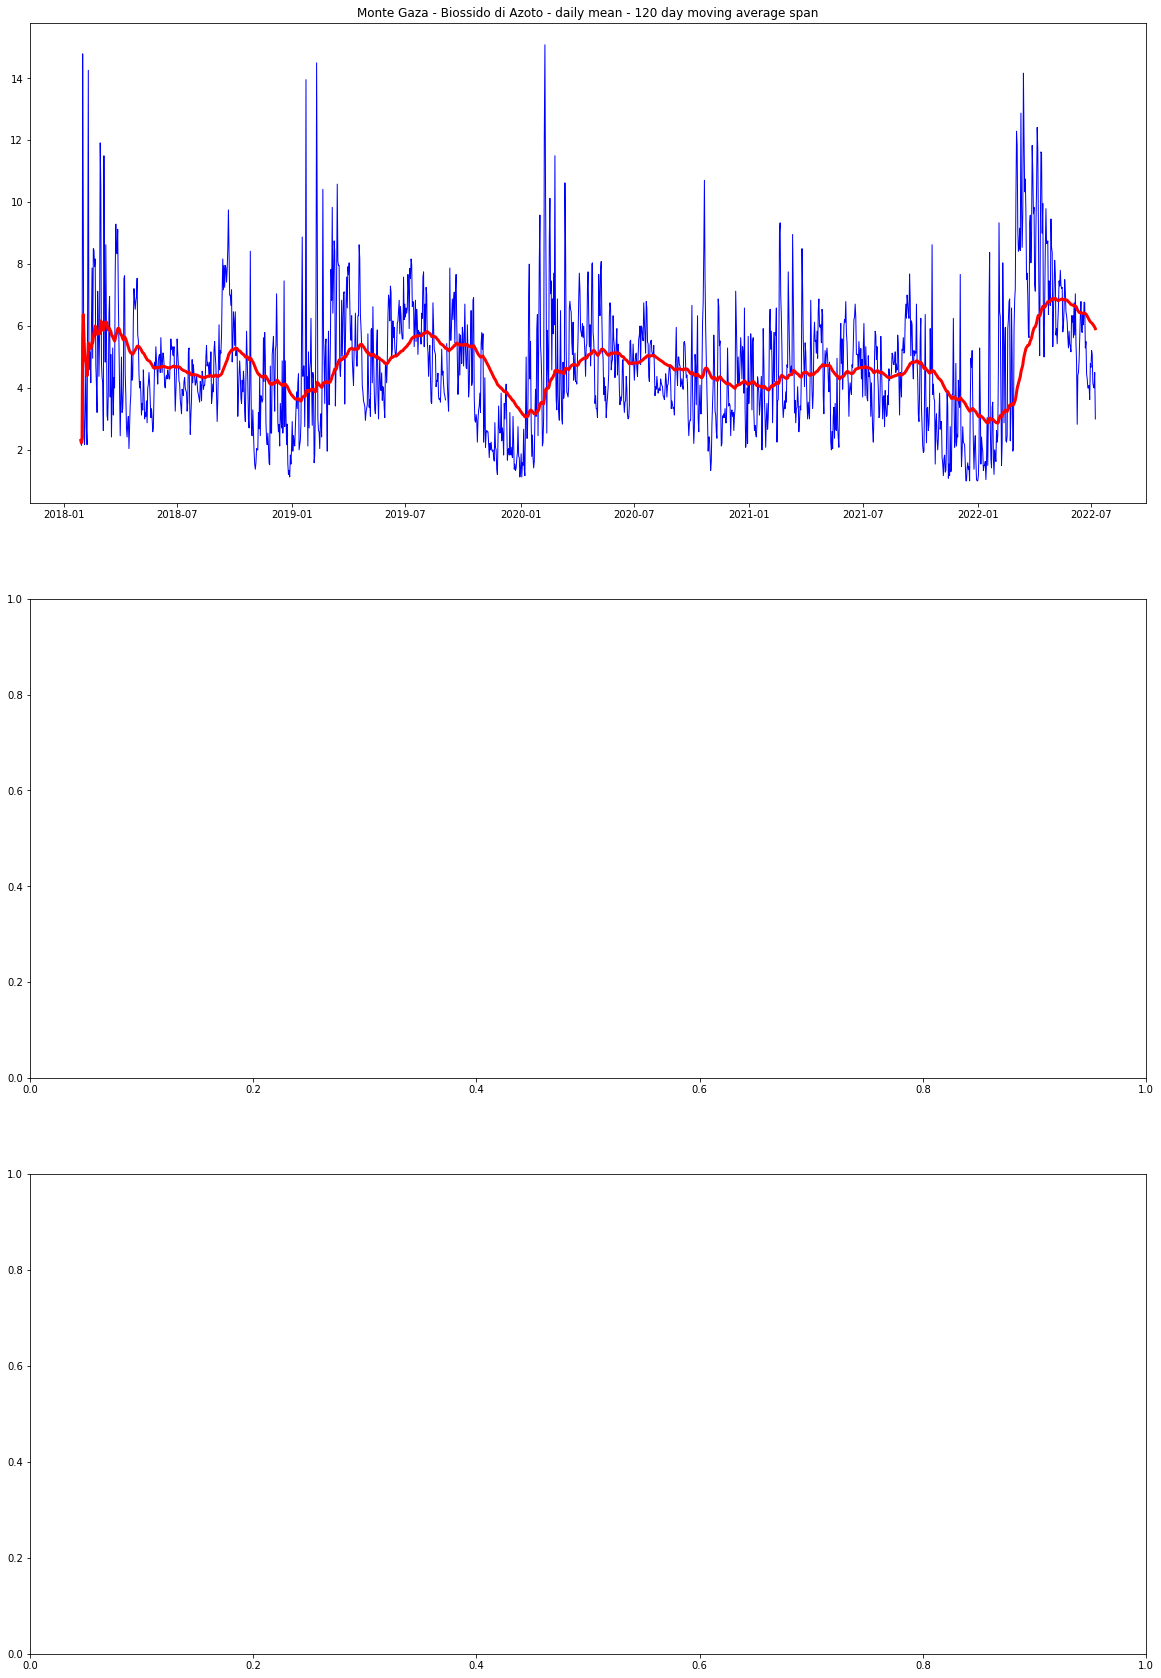

In [72]:
for i, station in enumerate(stations):
    pollutants = df[df.Stazione == station].Inquinante.unique()
    fig, ax = plt.subplots(nrows=len(pollutants), ncols=1, figsize=(20, 10*len(pollutants)))
    for j, pollutant in enumerate(pollutants):
        df_pollutant_station = subdf(df, pollutant, station)
        if df_pollutant_station.shape[0] > 2:
            new_df_compressed = compress_data(df_pollutant_station, 'D')
            ax[j].title.set_text(f"{station} - {pollutant} - daily mean - 120 day moving average span")
            plot_ewm(new_df_compressed, ax[j], 120)
            if new_df_compressed.Valore.max() > threshold[pollutant][0]:
                ax[j].axhspan(threshold[pollutant][0], threshold[pollutant][1], color='#f1c40f', alpha=0.7, zorder=-100)
                ax[j].axhspan(threshold[pollutant][1]+.001, max(new_df_compressed.Valore.max()+10, threshold[pollutant][1]), color='#e74c3c', alpha=0.7, zorder=-100)
            

In [8]:

plt.show()